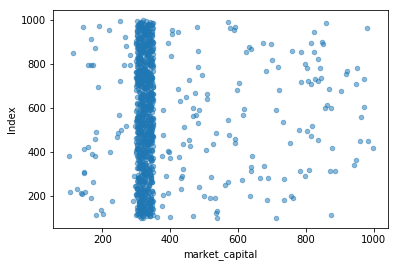

In [38]:
import numpy as np
import pandas as pd
import pylab as pl
%matplotlib inline

size = 100
start = 100
end = 1000
cols = ['market_capital']
D_100_300 = pd.DataFrame(np.random.randint(start, start*10, size = 2*size), columns=cols)
D_350_650 = pd.DataFrame(np.random.randint(start*3, start*3.5, size = 10*size), columns=cols)
D_700_1000 = pd.DataFrame(np.random.randint(start*7, end, size = 3*size), columns=cols)
Index = pd.DataFrame(np.random.randint(start, end, size = 10*size), columns=cols)

market_capital = D_100_300
market_capital = market_capital.append(D_350_650, ignore_index=True)
# market_capital = market_capital.append(D_700_1000, ignore_index=True)
market_capital['Index'] = Index
# Dataset = pd.DataFrame(D_300_400, columns=['market_capital'])
# Dataset = Dataset.append(pd.DataFrame(D_350_650, columns=['market_capital']), ignore_index=True, )
# market_capital = Dataset.append(pd.DataFrame(D_700_1000, columns=['market_capital']), ignore_index=True)
# market_capital['index'] = np.random.randint(100, 300, size = 100)


# market_capital.reset_index(inplace=True)
# print(market_capital)
market_capital.plot(kind='scatter', x='market_capital', y='Index', alpha=0.5)

In [57]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans_ouput = kmeans.fit(market_capital[['market_capital']])

[[321.07103321]
 [561.39655172]
 [842.63793103]]


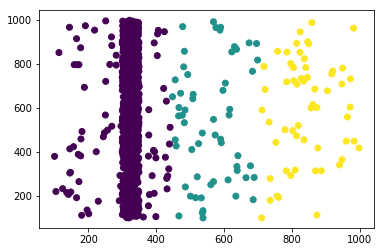

In [58]:
pl.scatter(x=market_capital['market_capital'], y=market_capital['Index'], c=kmeans_ouput.labels_)
# centers = kmeans_ouput.cluster_centers_
# pl.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
# pl.scatter(x=493.05, y=90, c='black')
print(kmeans_ouput.cluster_centers_)



In [59]:
Nc = range(1, 10)
kmeans_list = [KMeans(n_clusters=i) for i in Nc]
Y = market_capital[['market_capital']]
score = [kmeans_list[i].fit(Y).score(Y) for i in range(len(kmeans_list))]
    

Text(0.5,1,'Elbow Curve')

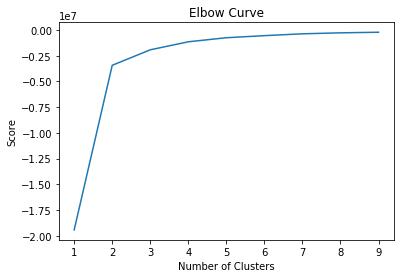

In [60]:
pl.plot(Nc,score)

pl.xlabel('Number of Clusters')

pl.ylabel('Score')

pl.title('Elbow Curve')